In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
astros = pd.read_csv('/Users/tylersmith/Desktop/STAT386/semester_project/astros.csv')
astros

,Gm#,Date,Tm,Home/Road,Opp,W/L,R,RA,Inn,W-L,...,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Season,Time_minutes
0,1,"Thursday, Mar 30",HOU,vs,CHW,L,2,3,9.0,0-1,...,Graveman,Pressly,López,2:38,N,43032.0,0.92,-,2023,158
1,2,"Friday, Mar 31",HOU,vs,CHW,W,6,3,9.0,1-1,...,Martinez,Graveman,Montero,2:40,N,41453.0,0.92,+,2023,160
2,3,"Saturday, Apr 1",HOU,vs,CHW,W,6,4,9.0,2-1,...,Stanek,Kelly,Neris,3:11,D,37519.0,0.93,++,2023,191
3,4,"Sunday, Apr 2",HOU,vs,CHW,L,3,6,9.0,2-2,...,Clevinger,Garcia,NaN,3:06,D,42835.0,1.00,-,2023,186
4,5,"Monday, Apr 3",HOU,vs,DET,L,6,7,11.0,2-3,...,Wingenter,Neris,Hill,3:21,N,29272.0,0.93,--,2023,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,158,"Wednesday, Sep 27",HOU,@,TEX,W,12,2,9.0,98-60,...,Verlander,Martinez,NaN,3:17,D,26053.0,0.18,+++,2017,197
1028,159,"Thursday, Sep 28",HOU,@,BOS,W,12,2,9.0,99-60,...,Peacock,Rodriguez,NaN,3:31,N,34222.0,0.10,++++,2017,211
1029,160,"Friday, Sep 29",HOU,@,BOS,W,3,2,9.0,100-60,...,Morton,Fister,Giles,2:47,N,36623.0,0.07,+++++,2017,167
1030,161,"Saturday, Sep 30",HOU,@,BOS,L,3,6,9.0,100-61,...,Pomeranz,McCullers,NaN,3:19,D,35722.0,0.14,-,2017,199


In [3]:
astros.dtypes

Gm#               int64
Date             object
Tm               object
Home/Road        object
Opp              object
W/L              object
R                 int64
RA                int64
Inn             float64
W-L              object
Rank              int64
GB               object
Win              object
Loss             object
Save             object
Time             object
D/N              object
Attendance      float64
cLI             float64
Streak           object
Season            int64
Time_minutes      int64
dtype: object

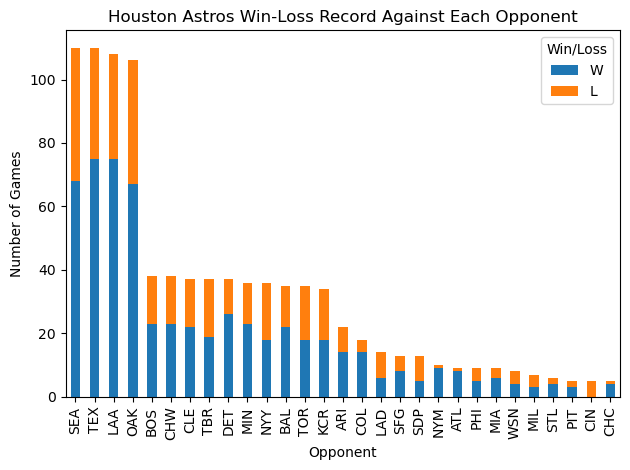

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate win-loss counts
win_loss_counts = astros.groupby(['Opp', 'W/L']).size().unstack(fill_value=0)

# Add a new column for total games played against each opponent
win_loss_counts['Total_Games'] = win_loss_counts['W'] + win_loss_counts['L']

# Sort by total games in descending order
win_loss_counts = win_loss_counts.sort_values(by='Total_Games', ascending=False)

# Plotting the sorted win-loss counts
win_loss_counts[['W', 'L']].plot(kind='bar', stacked=True)
plt.title('Houston Astros Win-Loss Record Against Each Opponent')
plt.xlabel('Opponent')
plt.ylabel('Number of Games')
plt.legend(title='Win/Loss')
plt.tight_layout()  # Adjust layout to fit the plot
plt.savefig('houston_astros_win_loss_record.png') # Save the figure
plt.show()


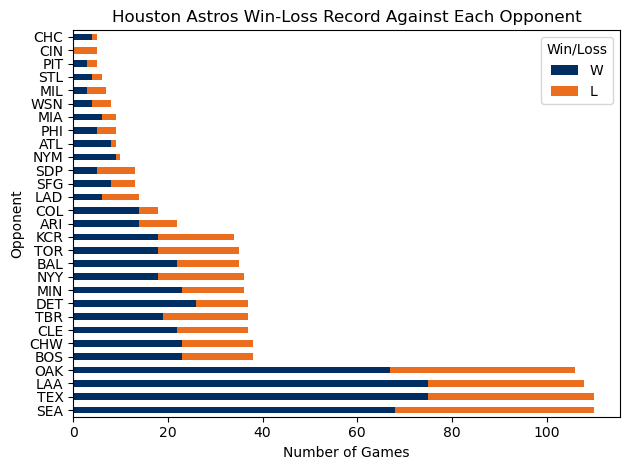

In [5]:
# Calculate win-loss counts
win_loss_counts = astros.groupby(['Opp', 'W/L']).size().unstack(fill_value=0)

# Add a new column for total games played against each opponent
win_loss_counts['Total_Games'] = win_loss_counts['W'] + win_loss_counts['L']

# Sort by total games in descending order
win_loss_counts = win_loss_counts.sort_values(by='Total_Games', ascending=False)

# Custom colors for the bars
colors = ['#002D62', '#EB6E1F']  # Blue for 'W', Orange for 'L'

# Plotting the sorted win-loss counts as a horizontal bar plot with custom colors
win_loss_counts[['W', 'L']].plot(kind='barh', stacked=True, color=colors)
plt.title('Houston Astros Win-Loss Record Against Each Opponent')
plt.ylabel('Opponent')
plt.xlabel('Number of Games')
plt.legend(title='Win/Loss')
plt.tight_layout()
plt.savefig('houston_astros_win_loss_record.png')
plt.show()


In [6]:
# Perform the groupby operation and ensure 'W' and 'L' are present
win_loss_counts = astros.groupby('Opp')['W/L'].value_counts().unstack(fill_value=0)[['W', 'L']]

# Calculate win percentage
win_loss_counts['Win_Percentage'] = win_loss_counts['W'] / (win_loss_counts['W'] + win_loss_counts['L'])

# Sort by win percentage
win_loss_counts = win_loss_counts.sort_values(by='Win_Percentage', ascending=False)


In [7]:
# Perform the groupby operation and ensure 'W' and 'L' are present
win_loss_counts = astros.groupby('Opp')['W/L'].value_counts().unstack(fill_value=0)[['W', 'L']]

# Calculate win percentage
win_loss_counts['Win_Percentage'] = win_loss_counts['W'] / (win_loss_counts['W'] + win_loss_counts['L'])

# Sort by win percentage
win_loss_counts = win_loss_counts.sort_values(by='Win_Percentage', ascending=False)
win_loss_counts



W/L,W,L,Win_Percentage
Opp,,,
NYM,9,1,0.900000
ATL,8,1,0.888889
CHC,4,1,0.800000
COL,14,4,0.777778
DET,26,11,0.702703
LAA,75,33,0.694444
TEX,75,35,0.681818
STL,4,2,0.666667
MIA,6,3,0.666667


In [8]:
max_percentage = win_loss_counts.loc[win_loss_counts['Win_Percentage'].idxmax()]
min_percentage = win_loss_counts.loc[win_loss_counts['Win_Percentage'].idxmin()]

print(max_percentage)
print(min_percentage)

W/L
W                 9.0
L                 1.0
Win_Percentage    0.9
Name: NYM, dtype: float64
W/L
W                 0.0
L                 5.0
Win_Percentage    0.0
Name: CIN, dtype: float64


In [9]:
astros.value_counts('W/L')

W/L
W     590
L     360
L*     41
W*     41
dtype: int64

In [10]:
# Calculate total wins and losses (including walk-offs)
total_wins = (astros['W/L'] == 'W').sum() + (astros['W/L'] == 'W*').sum()
total_losses = (astros['W/L'] == 'L').sum() + (astros['W/L'] == 'L*').sum()

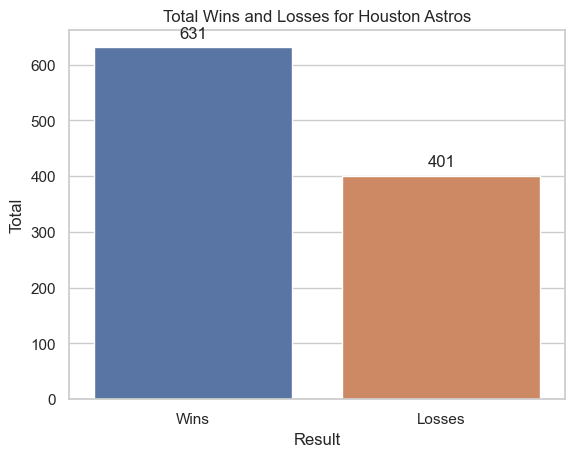

In [11]:

data = {
    'Result': ['Wins', 'Losses'],
    'Total': [total_wins, total_losses]
}
results_df = pd.DataFrame(data)

# Now let's create the bar plot
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Result', y='Total', data=results_df)

# Optional: Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Total Wins and Losses for Houston Astros')
plt.show()


In [12]:
win_percentage = round(total_wins / (total_wins + total_losses),3)
win_percentage

0.611

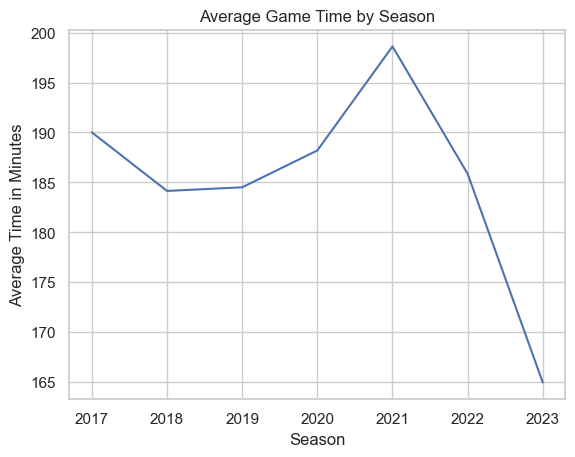

In [13]:
# Calculate the average time in minutes for each season
average_time_by_season = astros.groupby('Season')['Time_minutes'].mean().reset_index()

# Create a line chart with Seaborn
sns.lineplot(data=average_time_by_season, x='Season', y='Time_minutes')

# Label your axes and give a title to the plot
plt.xlabel('Season')
plt.ylabel('Average Time in Minutes')
plt.title('Average Game Time by Season')

# Display the plot
plt.show()

In [14]:
# To adjust your code to ensure that walk-off wins ('W*') and losses ('L*') are counted as regular wins ('W') and losses ('L'),
# you can modify the groupby operation to count 'W' and 'W*' together and 'L' and 'L*' together.

# Create a new column that normalizes 'W/L' to just 'W' or 'L', regardless of walk-offs
astros['Normalized_WL'] = astros['W/L'].str[0]

# Create a DataFrame to count wins and losses
win_loss_counts = astros.groupby(['Opp', 'Normalized_WL']).size().unstack(fill_value=0)

# Reset index to turn 'Opp' back into a column
win_loss_counts = win_loss_counts.reset_index()

# Use your existing division mapping
divisions_to_teams = {
    'AL East': ['NYY', 'BAL', 'TOR', 'BOS', 'TB'],
    'AL Central': ['CLE', 'DET', 'CHW', 'KCR', 'MIN'],
    'AL West': ['HOU', 'LAA', 'OAK', 'SEA', 'TEX'],
    'NL East': ['NYM', 'ATL', 'MIA', 'PHI', 'WSN'],
    'NL Central': ['CHC', 'MIL', 'CIN', 'PIT', 'STL'],
    'NL West': ['LAD', 'SDP', 'SFG', 'COL', 'ARI']
}

# Reverse the mapping: create a dictionary with team abbreviations as keys and their divisions as values.
team_to_division_mapping = {team: division for division, teams in divisions_to_teams.items() for team in teams}

# Use the new mapping with the map function to get the division for each opponent
win_loss_counts['Division'] = win_loss_counts['Opp'].map(team_to_division_mapping)

# Group by the new Division column and sum Wins and Losses
division_group = win_loss_counts.groupby('Division').sum()

# Calculate win percentage for each division
division_group['Win_Percentage'] = division_group['W'] / (division_group['W'] + division_group['L'])

# Sort
division_group = division_group.sort_values(by = 'Win_Percentage', ascending = False)

# Print the win percentage for each division
print(division_group[['W', 'L', 'Win_Percentage']])


Normalized_WL    W    L  Win_Percentage
Division                               
NL East         33   14        0.702128
AL West        303  169        0.641949
AL Central     120   78        0.606061
NL West         50   38        0.568182
AL East         89   68        0.566879
NL Central      15   16        0.483871


/var/folders/sx/239lgvxx1yn2qrq3szxf8q380000gn/T/ipykernel_62288/3778375735.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  division_group = win_loss_counts.groupby('Division').sum()


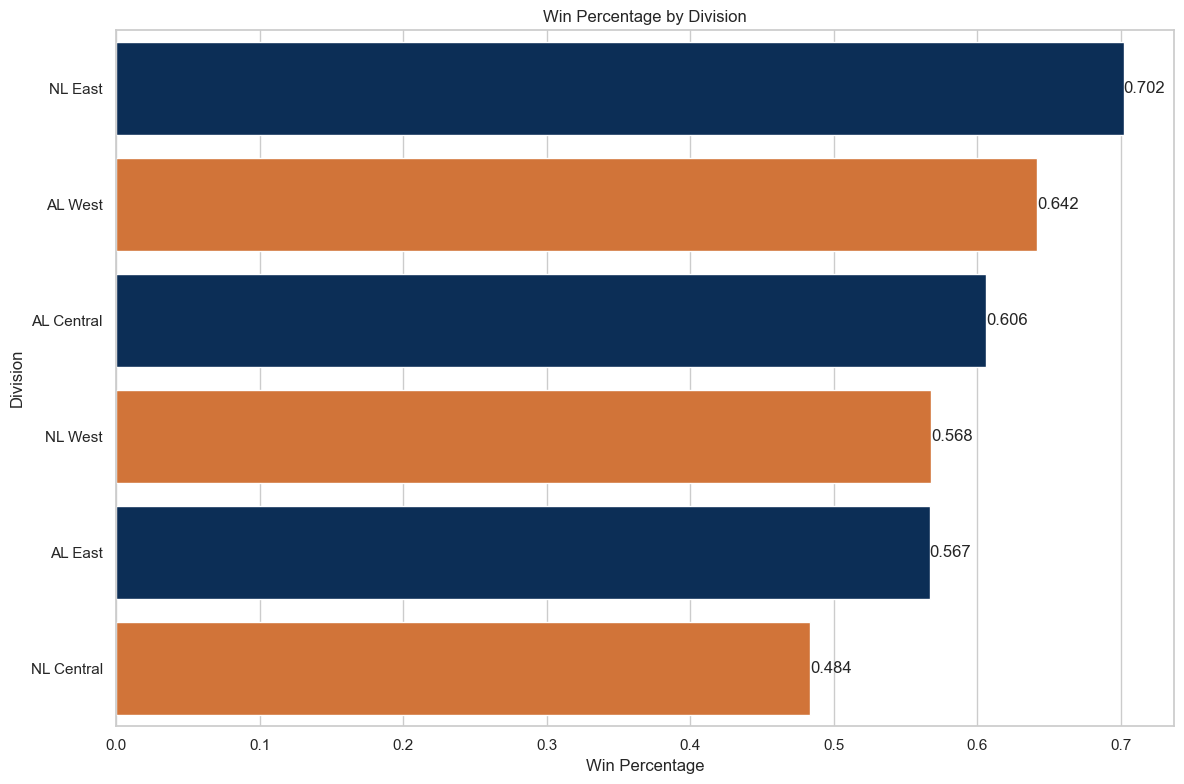

In [15]:
# Reset the index of the division_group DataFrame to make 'Division' a column again
division_group = division_group.reset_index()

# Sort the DataFrame by 'Win_Percentage' from highest to lowest
division_group_sorted = division_group.sort_values('Win_Percentage', ascending=False)

# Create a horizontal bar plot with Astros colors
plt.figure(figsize=(12, 8))  # Increase the figure size
barplot = sns.barplot(x='Win_Percentage', y='Division', data=division_group_sorted, palette=['#002D62', '#EB6E1F'])

# Add title and labels
plt.title('Win Percentage by Division')
plt.xlabel('Win Percentage')
plt.ylabel('Division')

# Annotate each bar with the value of the win percentage
for p in barplot.patches:
    width = p.get_width()  # get the width of each bar
    plt.text(width if width > 0.01 else 0.01,  # position text slightly right of the bar's end if width is greater than 0.01
             p.get_y() + p.get_height() / 2,  # position text at the center height of the bar
             f'{width:.3f}',  # format text with 3 decimal places
             ha = 'left', va = 'center')  # align the text to the left

# Display the plot
plt.tight_layout()  # Adjust the plot to make sure everything fits without overlapping
plt.show()


In [16]:
avg_runs_per_game = astros.groupby('Season')['R'].mean().reset_index()
avg_runs_per_game

,Season,R
0,2017,5.530864
1,2018,4.919753
2,2019,5.679012
3,2020,4.650000
4,2021,5.327160
5,2022,4.549383
6,2023,5.104938


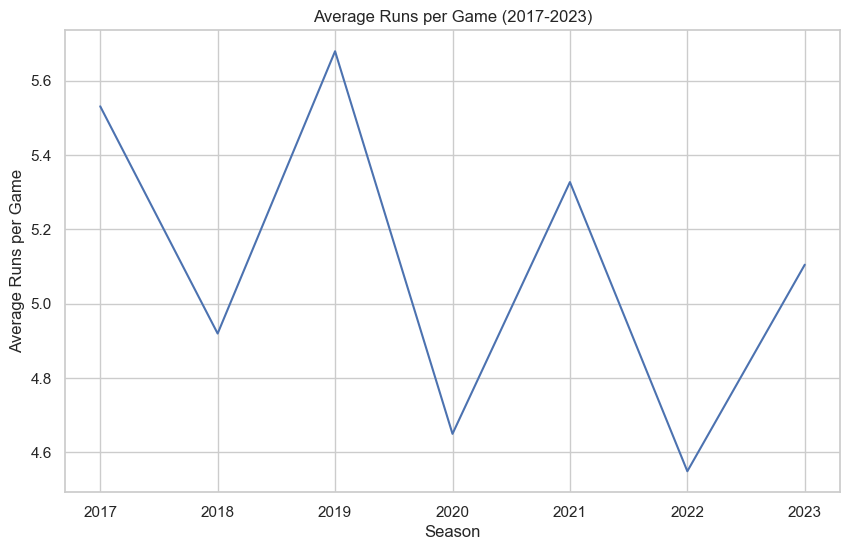

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_runs_per_game, x='Season', y='R')
plt.title('Average Runs per Game (2017-2023)')
plt.xlabel('Season')
plt.ylabel('Average Runs per Game')
plt.xticks(avg_runs_per_game['Season'])  # This ensures that all years are shown on the x-axis.
plt.grid(True)  # Optional: adds a grid to the chart for better readability
plt.show()

In [18]:
avg_runs_allowed_per_game = astros.groupby('Season')['RA'].mean().reset_index()
avg_runs_allowed_per_game

,Season,RA
0,2017,4.320988
1,2018,3.296296
2,2019,3.950617
3,2020,4.583333
4,2021,4.061728
5,2022,3.197531
6,2023,4.308642


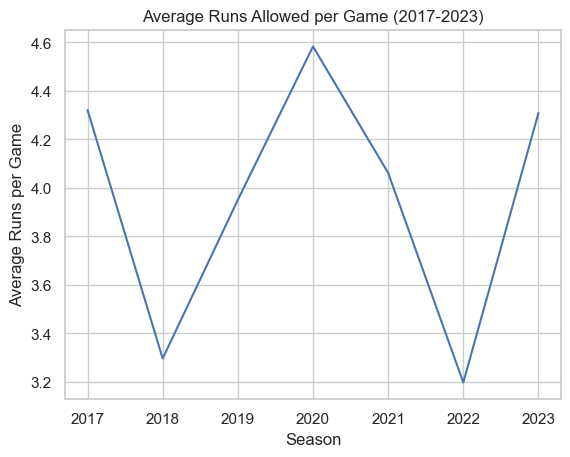

In [19]:
sns.lineplot(data= avg_runs_allowed_per_game, x='Season', y= 'RA')
plt.title('Average Runs Allowed per Game (2017-2023)')
plt.xlabel('Season')
plt.ylabel('Average Runs per Game')
plt.xticks(avg_runs_allowed_per_game['Season'])  # This ensures that all years are shown on the x-axis.
plt.grid(True)  # Optional: adds a grid to the chart for better readability
plt.show()

In [20]:
total_runs_by_season = astros.groupby('Season')['R'].sum().reset_index()
print(total_runs_by_season)

total_runs_allowed_by_season = astros.groupby('Season')['RA'].sum().reset_index()
print(total_runs_allowed_by_season)

   Season    R
0    2017  896
1    2018  797
2    2019  920
3    2020  279
4    2021  863
5    2022  737
6    2023  827
   Season   RA
0    2017  700
1    2018  534
2    2019  640
3    2020  275
4    2021  658
5    2022  518
6    2023  698


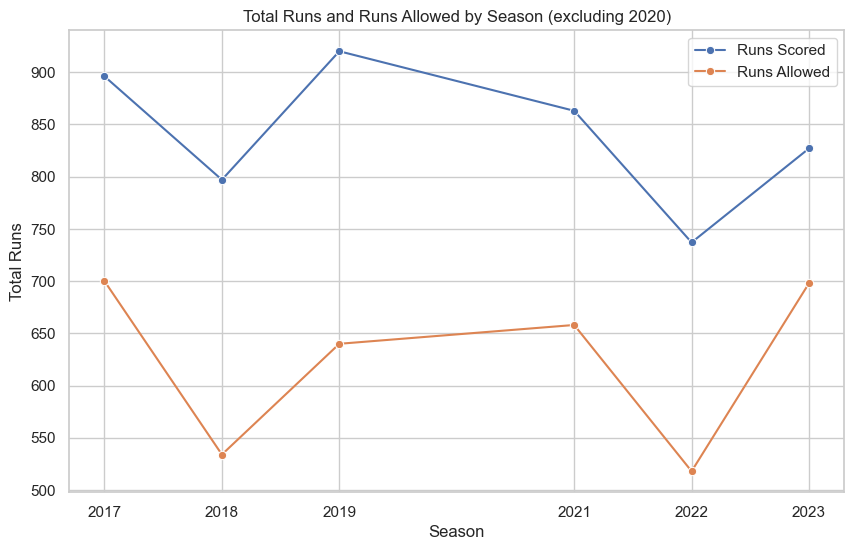

In [21]:
# Filter out the 2020 season
total_runs_by_season = total_runs_by_season[total_runs_by_season['Season'] != 2020]
total_runs_allowed_by_season = total_runs_allowed_by_season[total_runs_allowed_by_season['Season'] != 2020]

# Set the style of the seaborn plot
sns.set_style("whitegrid")

# Create a figure and a set of subplots
plt.figure(figsize=(10, 6))

# Plot total runs by season, excluding 2020
sns.lineplot(data=total_runs_by_season, x='Season', y='R', label='Runs Scored', marker='o')

# Plot total runs allowed by season, excluding 2020
sns.lineplot(data=total_runs_allowed_by_season, x='Season', y='RA', label='Runs Allowed', marker='o')

# Add some helpful labels and title to the plot
plt.title('Total Runs and Runs Allowed by Season (excluding 2020)')
plt.xlabel('Season')
plt.ylabel('Total Runs')

# Ensure that every season is represented on the x-axis, excluding 2020
plt.xticks(total_runs_by_season['Season'])

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()



In [22]:
rank_counts = astros['Rank'].value_counts()
rank_counts

1    709
2    246
3     51
4     24
5      2
Name: Rank, dtype: int64

In [23]:
# The Astros were in last place for two games early in the 2021 season
last_place_rows = astros[astros['Rank'] == 5]
last_place_rows

,Gm#,Date,Tm,Home/Road,Opp,W/L,R,RA,Inn,W-L,...,Loss,Save,Time,D/N,Attendance,cLI,Streak,Season,Time_minutes,Normalized_WL
340,17,"Wednesday, Apr 21",HOU,@,COL,L,3,6,9.0,7-10,...,Urquidy,NaN,2:34,D,7120.0,0.84,---,2021,154,L
341,18,"Thursday, Apr 22",HOU,vs,LAA,W,8,2,9.0,8-10,...,Cobb,NaN,3:43,N,13985.0,0.87,+,2021,223,W


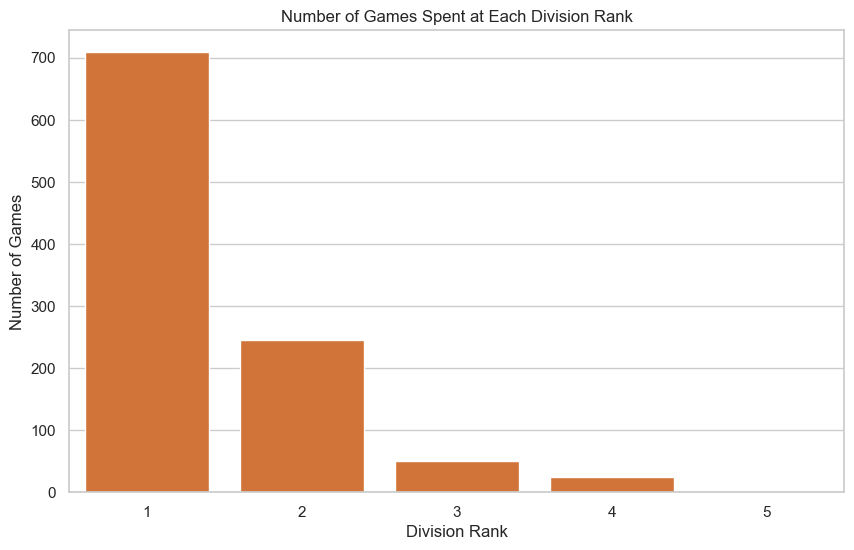

In [24]:
# Set the style of the seaborn plot
sns.set_style("whitegrid")

# Create a bar chart for the rank counts with all bars set to a darker orange
plt.figure(figsize=(10, 6))
sns.barplot(x=rank_counts.index, y=rank_counts.values, color="#EB6E1F")  # Set bars to darker orange

# Add some helpful labels and title to the plot
plt.title('Number of Games Spent at Each Division Rank')
plt.xlabel('Division Rank')
plt.ylabel('Number of Games')

# Show the plot
plt.show()


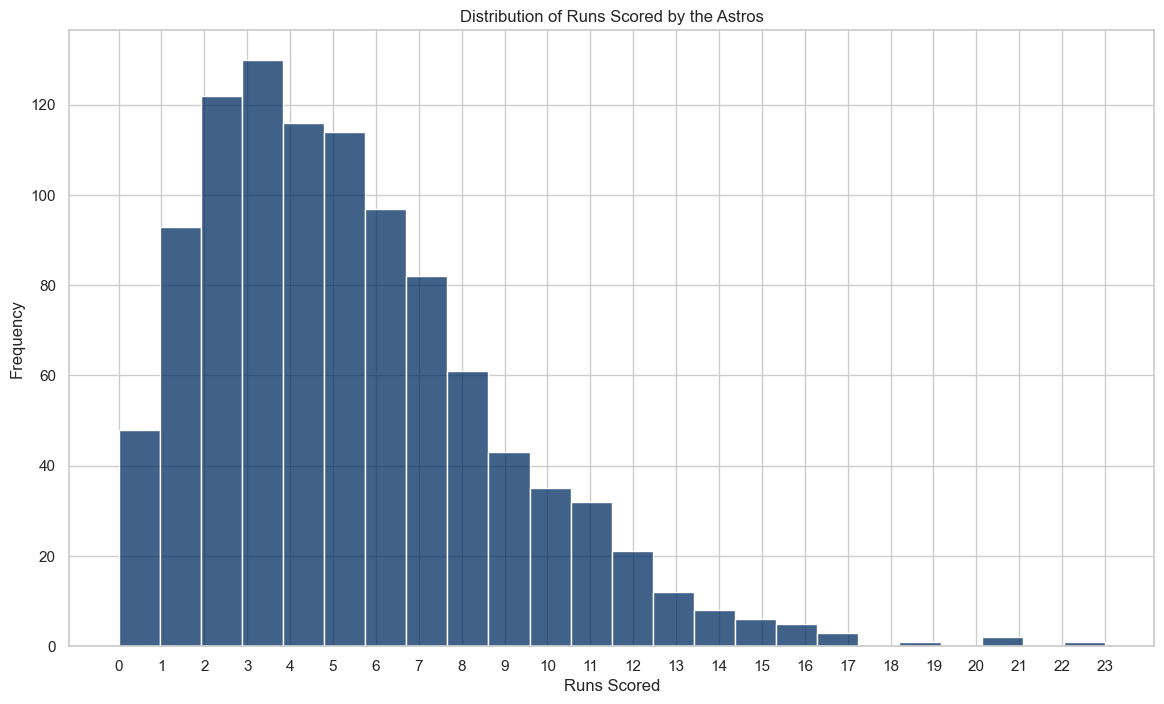

In [25]:
# Set the style of the seaborn plot
sns.set_style("whitegrid")

# Create the histogram for the distribution of runs scored
plt.figure(figsize=(14, 8))  # Adjust the figure size to accommodate the number of bins
sns.histplot(astros['R'], kde=False, color='#002D62', bins=24)  # 24 bins for 0 to 23 runs

# Add some helpful labels and title to the plot
plt.title('Distribution of Runs Scored by the Astros')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')

# Since we know the range of runs, we can set the x-ticks to show each run value
plt.xticks(range(24))  # This sets the x-axis ticks to show each run total

# Show the plot
plt.show()



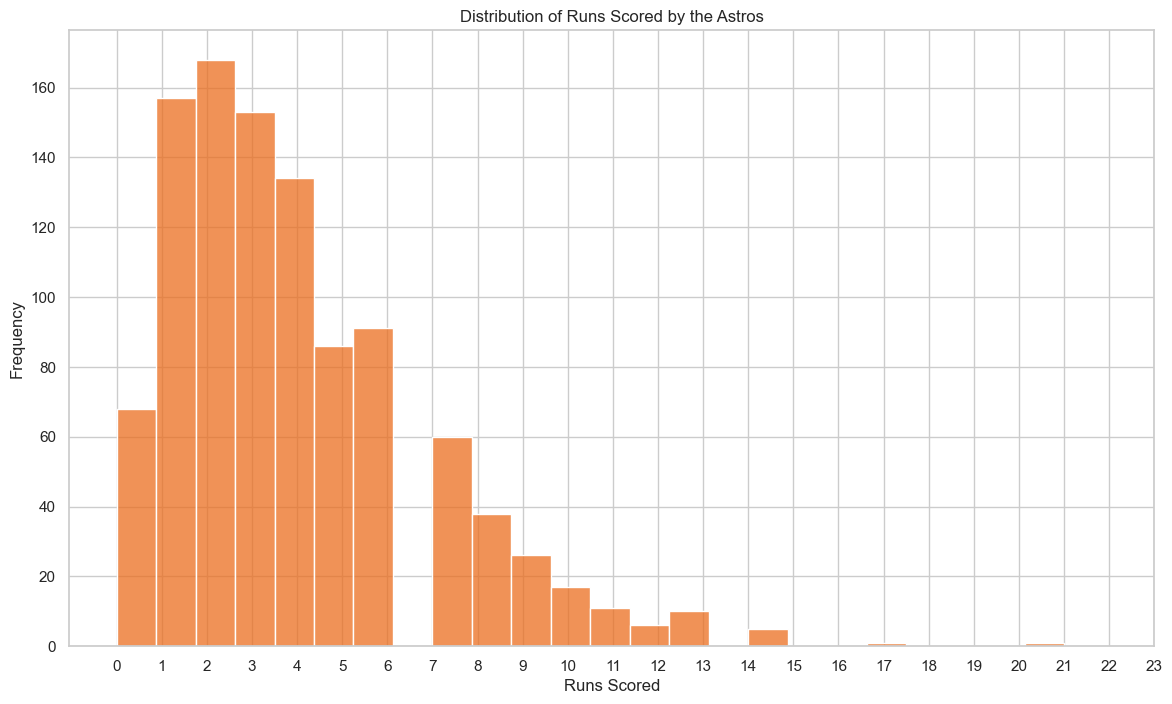

In [26]:
# Set the style of the seaborn plot
sns.set_style("whitegrid")

# Create the histogram for the distribution of runs scored
plt.figure(figsize=(14, 8))  # Adjust the figure size to accommodate the number of bins
sns.histplot(astros['RA'], kde=False, color='#EB6E1F', bins=24)  # 24 bins for 0 to 23 runs

# Add some helpful labels and title to the plot
plt.title('Distribution of Runs Scored by the Astros')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')

# Since we know the range of runs, we can set the x-ticks to show each run value
plt.xticks(range(24))  # This sets the x-axis ticks to show each run total

# Show the plot
plt.show()

In [27]:
import pandas as pd
from datetime import datetime
import re  # Import the regex module

# Define a function to convert the date strings to datetime objects, assuming the current year
def convert_dates(date_series):
    converted_dates = pd.Series(index=date_series.index, dtype="datetime64[ns]")
    date_format = '%A, %b %d'  # Date format without the year
    for i, date_str in enumerate(date_series):
        date_str = date_str.strip()  # Remove any leading/trailing whitespace
        # Use regex to remove parentheses and any content within them
        date_str = re.sub(r'\(\d+\)', '', date_str)
        try:
            # Parse the date string into a datetime object
            converted_date = datetime.strptime(date_str, date_format)
            # Assume the year of the date is the current year
            converted_date = converted_date.replace(year=datetime.now().year)
            # Assign the converted date to the series
            converted_dates[i] = converted_date
        except ValueError as e:
            # If there's an error, print it and skip this date
            print(f"Error converting date at index {i}: {e}")
            continue
    return converted_dates

# Load your data into a dataframe (replace 'path_to_your_csv_file' with your actual file path)
astros = pd.read_csv('/Users/tylersmith/Desktop/STAT386/semester_project/astros.csv')

# Convert the 'Date' column using the convert_dates function
astros['Date'] = convert_dates(astros['Date'])

# Extract the month from the 'Date' column
astros['Month'] = astros['Date'].dt.strftime('%B')

# Group by the 'Month' column and calculate Wins, Losses, and Win percentage
month_record = astros.groupby('Month').agg(
    Wins=('W/L', lambda x: (x.str.startswith('W')).sum()),  # Count 'W' and 'W*'
    Losses=('W/L', lambda x: (x.str.startswith('L')).sum())  # Count 'L' and 'L*'
)

# Calculate win percentage
month_record['Win_Percentage'] = month_record['Wins'] / (month_record['Wins'] + month_record['Losses'])

# Reset index
month_record.reset_index(inplace=True)

# Sort by Win Percentage
month_record.sort_values(by = 'Win_Percentage', ascending=False)

month_record = month_record.sort_values(by='Win_Percentage', ascending=False)

# Print or return the final grouped dataframe
print(month_record)


       Month  Wins  Losses  Win_Percentage
6    October     8       2        0.800000
5        May   111      57        0.660714
2       July    98      58        0.628205
7  September   115      71        0.618280
3       June    98      63        0.608696
0      April    90      61        0.596026
1     August   107      84        0.560209
4      March     4       5        0.444444


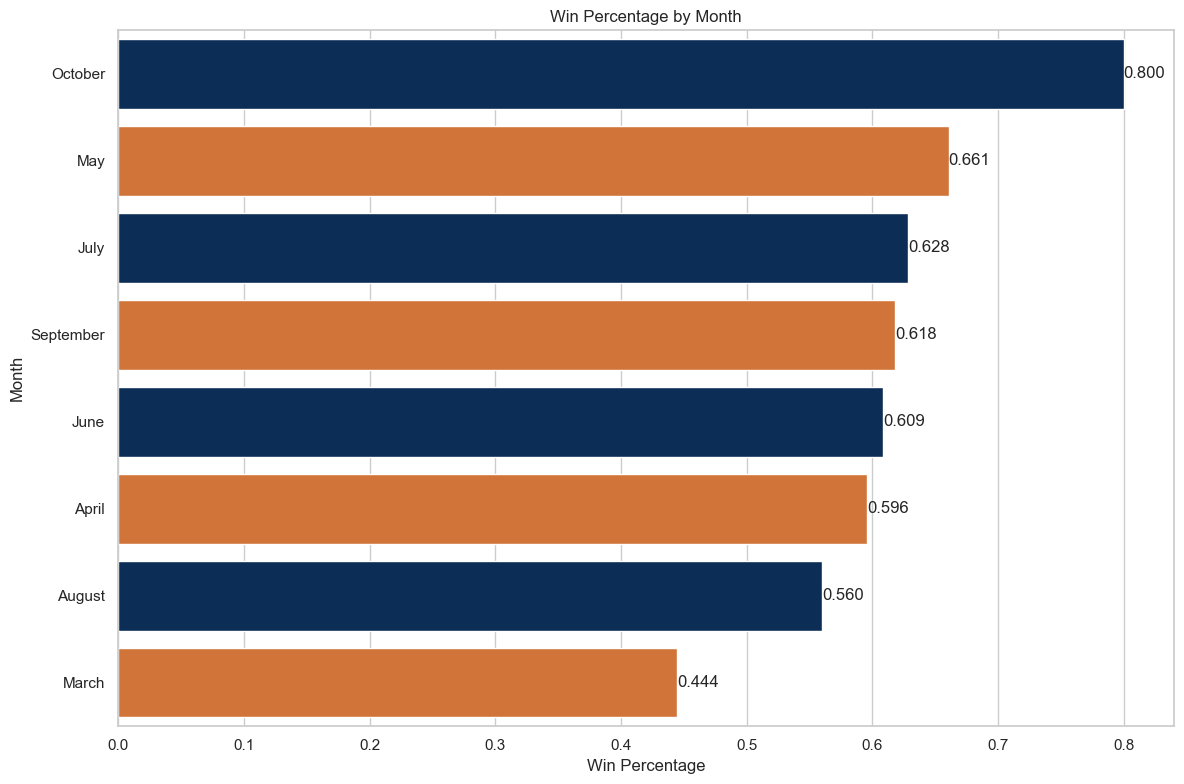

In [28]:
# Create a horizontal bar plot with Astros colors
plt.figure(figsize=(12, 8))  # Increase the figure size
barplot = sns.barplot(x='Win_Percentage', y='Month', data=month_record, palette=['#002D62', '#EB6E1F'])

# Add title and labels
plt.title('Win Percentage by Month')
plt.xlabel('Win Percentage')
plt.ylabel('Month')

# Annotate each bar with the value of the win percentage
for p in barplot.patches:
    width = p.get_width()  # get the width of each bar
    plt.text(width if width > 0.01 else 0.01,  # position text slightly right of the bar's end if width is greater than 0.01
             p.get_y() + p.get_height() / 2,  # position text at the center height of the bar
             f'{width:.3f}',  # format text with 3 decimal places
             ha = 'left', va = 'center')  # align the text to the left

# Display the plot
plt.tight_layout()  # Adjust the plot to make sure everything fits without overlapping
plt.show()

In [29]:
# Group by the 'Season' column and calculate Wins, Losses, and Win percentage
astros_season_record = astros.groupby('Season').agg(
    Wins=('W/L', lambda x: (x.str.startswith('W')).sum()),  # Count 'W' and 'W*'
    Losses=('W/L', lambda x: (x.str.startswith('L')).sum())  # Count 'L' and 'L*'
)

# Calculate win percentage
astros_season_record['Win_Percentage'] = astros_season_record['Wins'] / (astros_season_record['Wins'] + astros_season_record['Losses'])

# Sort the records by 'Win_Percentage' in descending order to have the highest percentage on top
astros_season_record_sorted = astros_season_record.sort_values(by='Win_Percentage', ascending=False)

# Reset index if you want 'Season' as a column
astros_season_record_sorted.reset_index(inplace=True)

# Print or return the sorted DataFrame
print(astros_season_record_sorted)


   Season  Wins  Losses  Win_Percentage
0    2019   107      55        0.660494
1    2022   106      56        0.654321
2    2018   103      59        0.635802
3    2017   101      61        0.623457
4    2021    95      67        0.586420
5    2023    90      72        0.555556
6    2020    29      31        0.483333


In [30]:
# Group by 'Season' and 'Month' and calculate Wins (including walk-offs), Losses (including walk-offs), and Win percentage
astros_month_season_record = astros.groupby(['Season', 'Month']).agg(
    Wins=('W/L', lambda x: (x.str.startswith('W')).sum()),  # Count 'W' and 'W*'
    Losses=('W/L', lambda x: (x.str.startswith('L')).sum())  # Count 'L' and 'L*'
)

# Calculate win percentage
astros_month_season_record['Win_Percentage'] = astros_month_season_record['Wins'] / (astros_month_season_record['Wins'] + astros_month_season_record['Losses'])

# Sort the records within each season by month and then by 'Win_Percentage' in descending order
astros_month_season_record_sorted = astros_month_season_record.sort_values(by=['Season', 'Month', 'Win_Percentage'], ascending=[True, True, False])

# Reset index to turn the MultiIndex into columns
astros_month_season_record_sorted.reset_index(inplace=True)

# Print or return the sorted DataFrame
print(astros_month_season_record_sorted)


    Season      Month  Wins  Losses  Win_Percentage
0     2017      April    16       9        0.640000
1     2017     August    11      17        0.392857
2     2017       July    15       9        0.625000
3     2017       June    16      11        0.592593
4     2017        May    22       7        0.758621
5     2017    October     1       0        1.000000
6     2017  September    20       8        0.714286
7     2018      April    18       9        0.666667
8     2018     August    14      12        0.538462
9     2018       July    13      11        0.541667
10    2018       June    19       8        0.703704
11    2018      March     2       1        0.666667
12    2018        May    16      12        0.571429
13    2018  September    21       6        0.777778
14    2019      April    17       9        0.653846
15    2019     August    19       9        0.678571
16    2019       July    16       8        0.666667
17    2019       June    15      12        0.555556
18    2019  

In [31]:
# Replace the space between '+' and the number with no space
astros['GB'] = astros['GB'].str.replace(r'\+\s', '+', regex=True)

# Check the output
print(astros['GB'].unique())


['1.0' '0.5' '1.5' '2.5' '3.5' '2.0' '4.5' '3.0' '4.0' '5.0' '5.5' '6.5'
 '6.0' 'Tied' '+1.0' '+0.5' '+1.5' '+2.5' '+2.0' '+3.5' '+4.0' '+5.0'
 '+5.5' '+7.5' '+8.5' '+9.5' '+9.0' '+8.0' '+10.0' '+10.5' '+11.0' '+11.5'
 '+12.5' '+13.5' '+13.0' '+12.0' '+14.0' '+15.0' '+16.0' '+17.0' '+18.0'
 '+15.5' '+16.5' '+3.0' '+4.5' '+6.0' '+6.5' '+7.0' '7.0' '+14.5' '+19.0'
 '+20.0' '+21.0']


In [32]:
astros.dtypes

Gm#                      int64
Date            datetime64[ns]
Tm                      object
Home/Road               object
Opp                     object
W/L                     object
R                        int64
RA                       int64
Inn                    float64
W-L                     object
Rank                     int64
GB                      object
Win                     object
Loss                    object
Save                    object
Time                    object
D/N                     object
Attendance             float64
cLI                    float64
Streak                  object
Season                   int64
Time_minutes             int64
Month                   object
dtype: object

/var/folders/sx/239lgvxx1yn2qrq3szxf8q380000gn/T/ipykernel_62288/1634601460.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  astros_season['GB'] = astros_season['GB'].astype(str)
/var/folders/sx/239lgvxx1yn2qrq3szxf8q380000gn/T/ipykernel_62288/1634601460.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  astros_season['GB_Clean'] = astros_season['GB'].replace('Tied', '0').str.replace(r'\+', '', regex=True)
/var/folders/sx/239lgvxx1yn2qrq3szxf8q380000gn/T/ipykernel_62288/1634601460.py:15: SettingWithCo

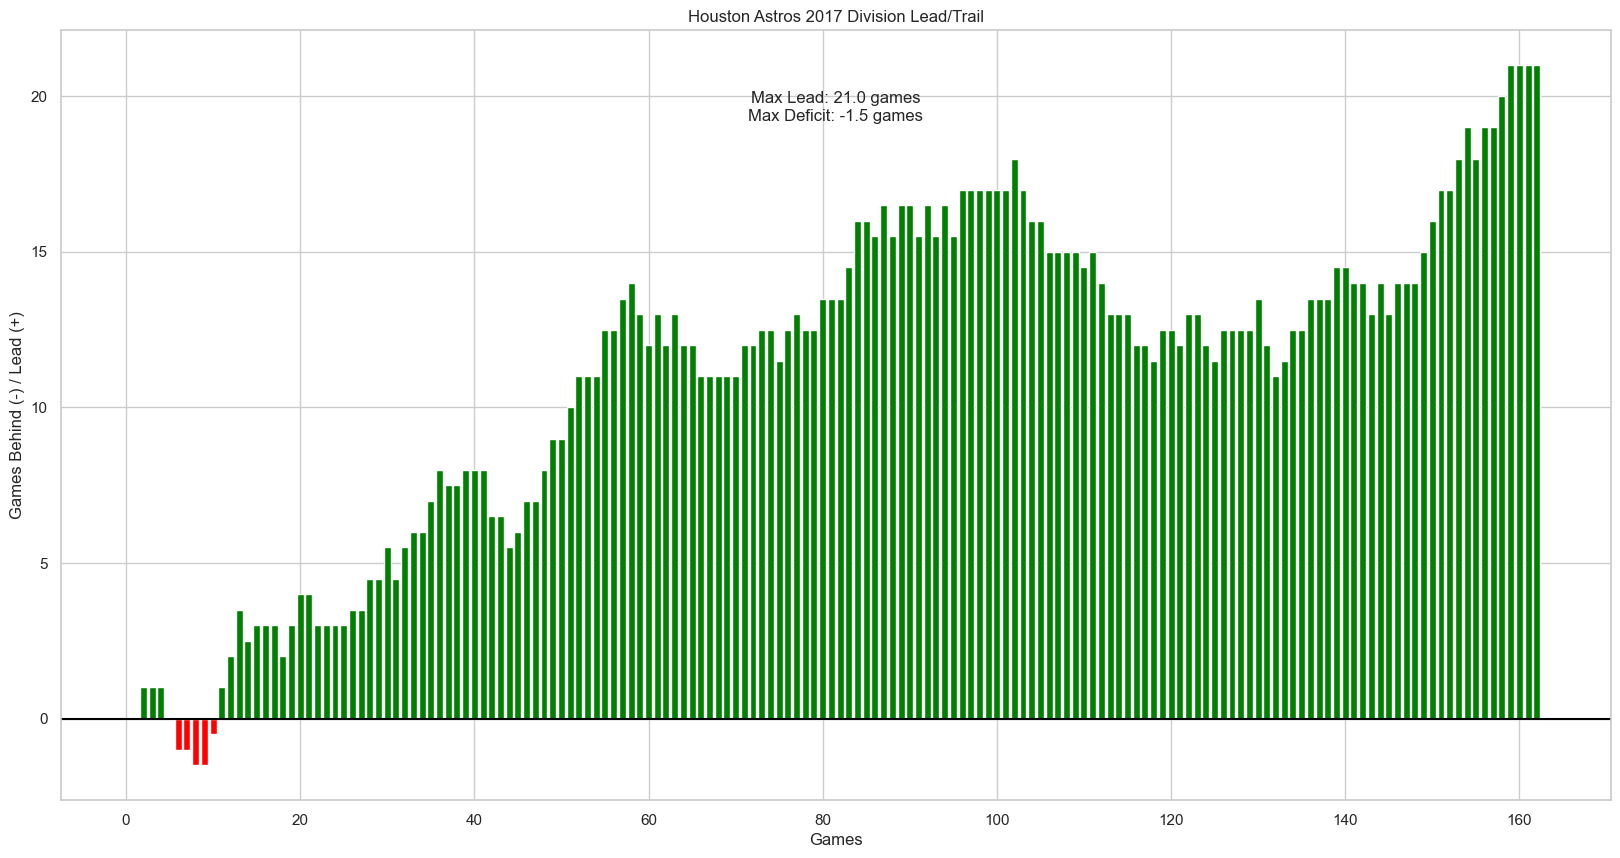

/var/folders/sx/239lgvxx1yn2qrq3szxf8q380000gn/T/ipykernel_62288/1634601460.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  astros_season['GB'] = astros_season['GB'].astype(str)
/var/folders/sx/239lgvxx1yn2qrq3szxf8q380000gn/T/ipykernel_62288/1634601460.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  astros_season['GB_Clean'] = astros_season['GB'].replace('Tied', '0').str.replace(r'\+', '', regex=True)
/var/folders/sx/239lgvxx1yn2qrq3szxf8q380000gn/T/ipykernel_62288/1634601460.py:15: SettingWithCo

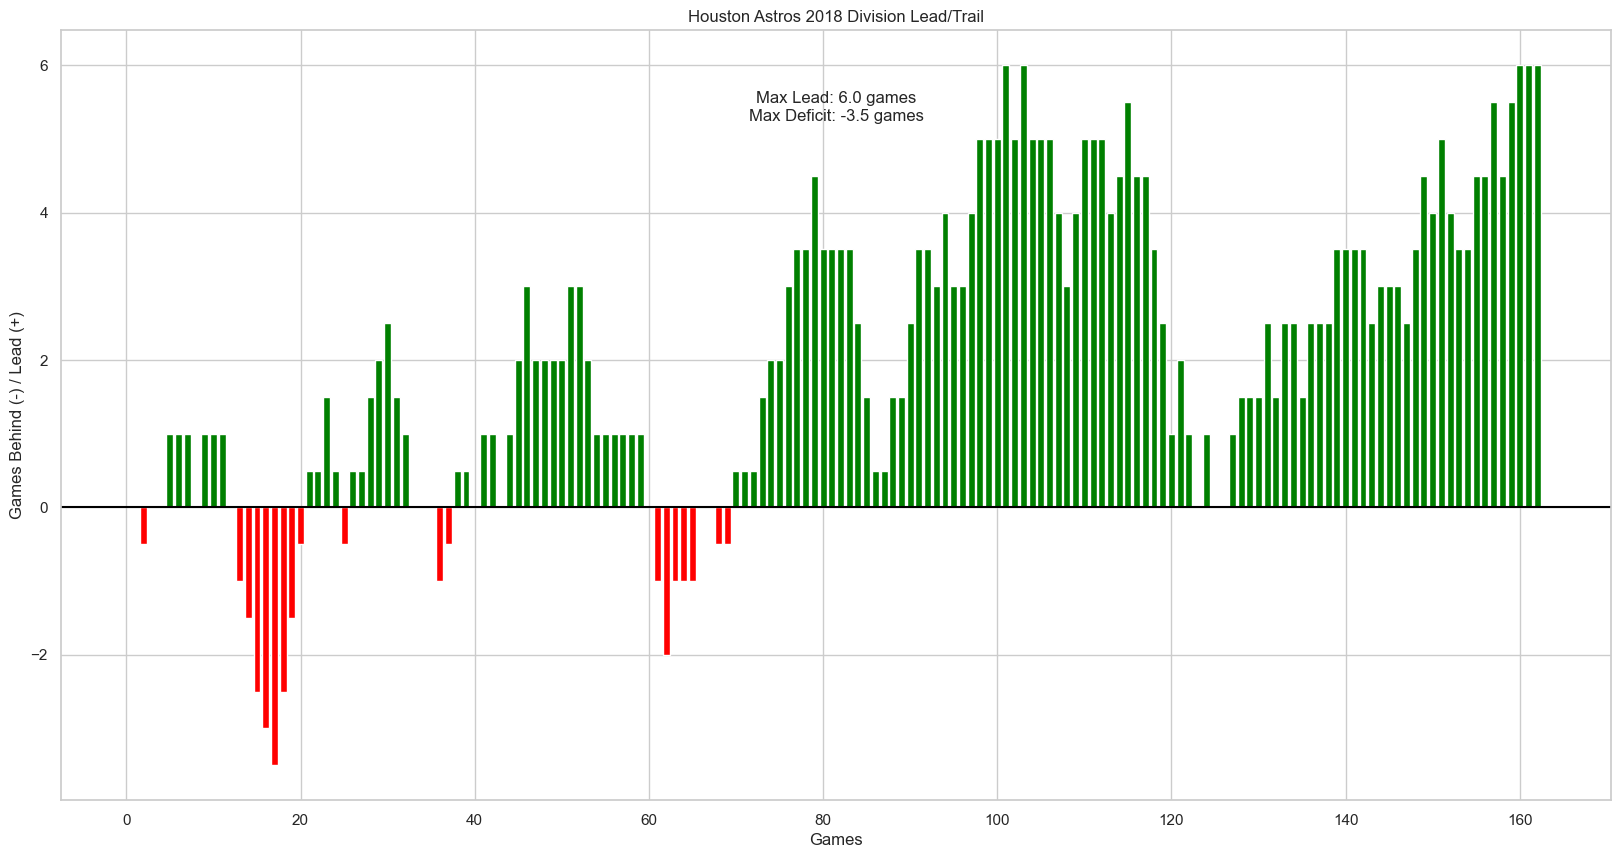

/var/folders/sx/239lgvxx1yn2qrq3szxf8q380000gn/T/ipykernel_62288/1634601460.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  astros_season['GB'] = astros_season['GB'].astype(str)
/var/folders/sx/239lgvxx1yn2qrq3szxf8q380000gn/T/ipykernel_62288/1634601460.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  astros_season['GB_Clean'] = astros_season['GB'].replace('Tied', '0').str.replace(r'\+', '', regex=True)
/var/folders/sx/239lgvxx1yn2qrq3szxf8q380000gn/T/ipykernel_62288/1634601460.py:15: SettingWithCo

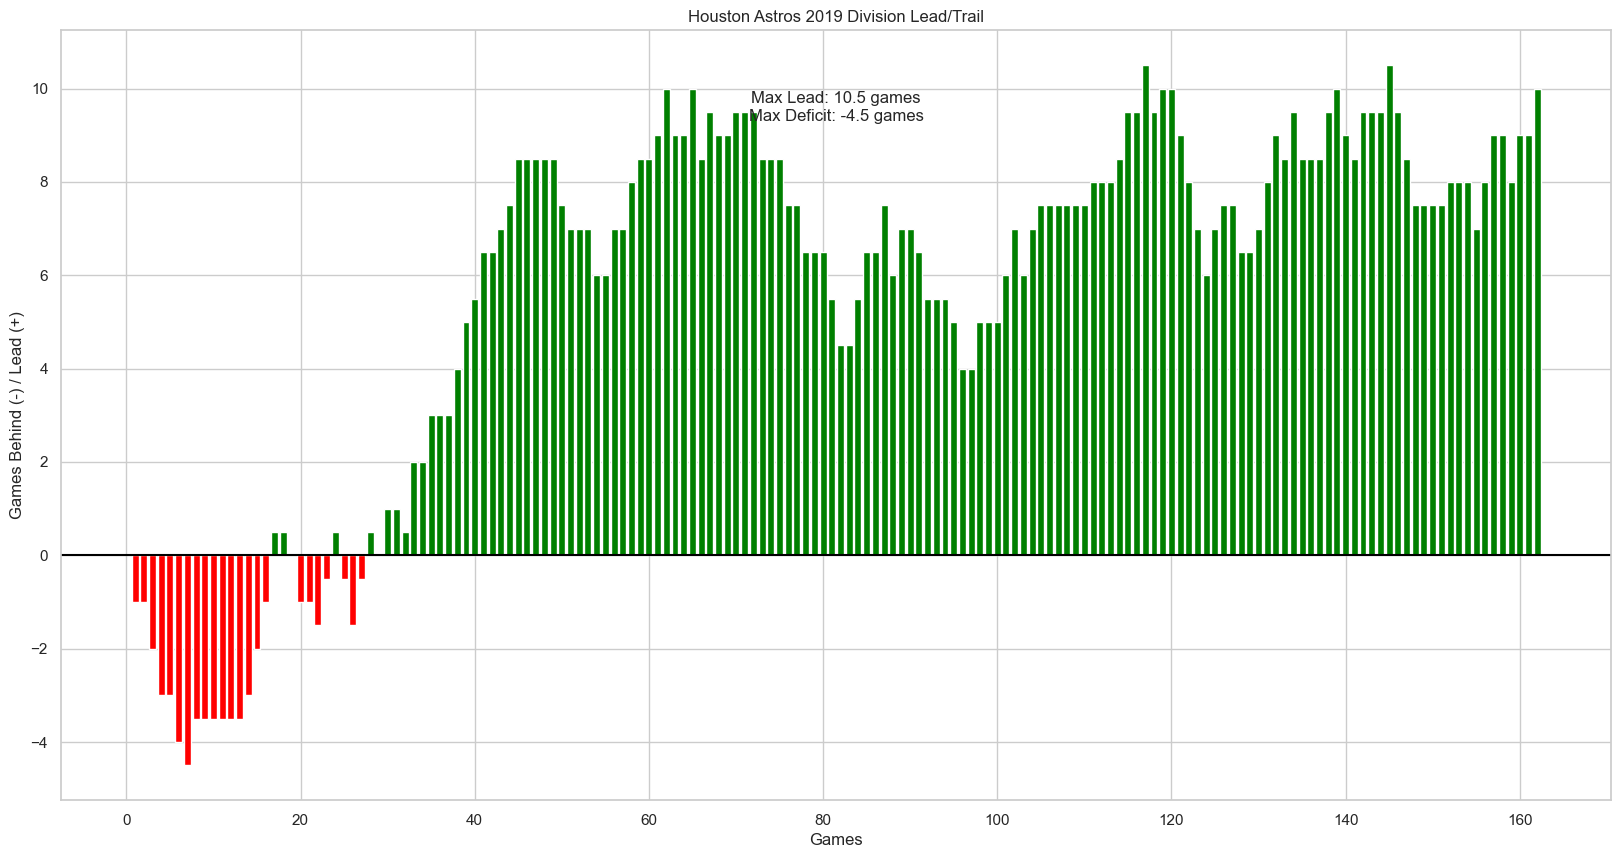

/var/folders/sx/239lgvxx1yn2qrq3szxf8q380000gn/T/ipykernel_62288/1634601460.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  astros_season['GB'] = astros_season['GB'].astype(str)
/var/folders/sx/239lgvxx1yn2qrq3szxf8q380000gn/T/ipykernel_62288/1634601460.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  astros_season['GB_Clean'] = astros_season['GB'].replace('Tied', '0').str.replace(r'\+', '', regex=True)
/var/folders/sx/239lgvxx1yn2qrq3szxf8q380000gn/T/ipykernel_62288/1634601460.py:15: SettingWithCo

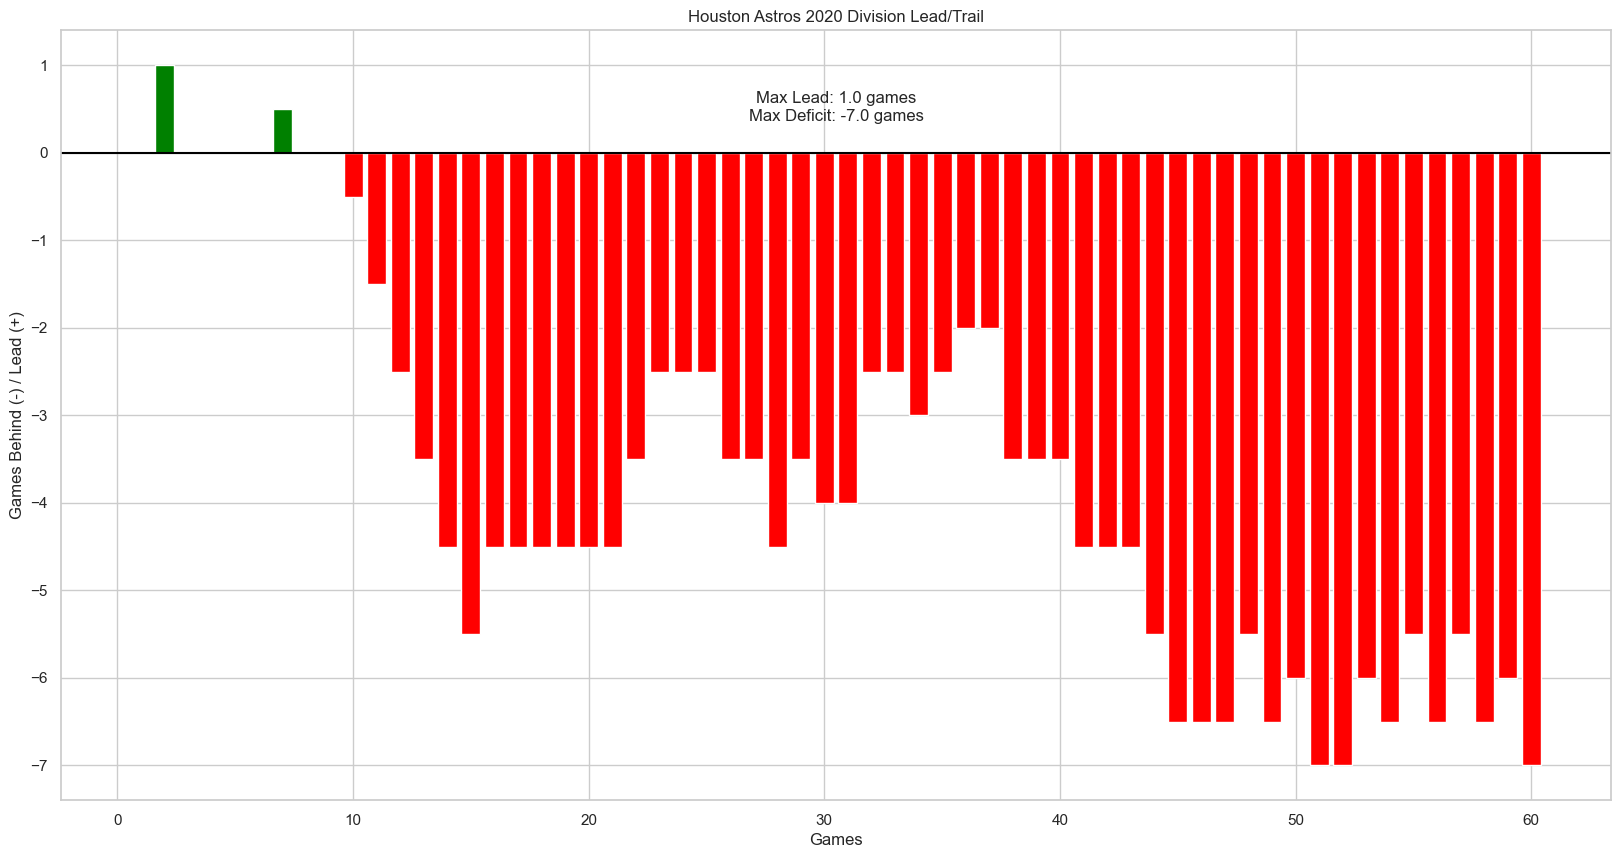

/var/folders/sx/239lgvxx1yn2qrq3szxf8q380000gn/T/ipykernel_62288/1634601460.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  astros_season['GB'] = astros_season['GB'].astype(str)
/var/folders/sx/239lgvxx1yn2qrq3szxf8q380000gn/T/ipykernel_62288/1634601460.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  astros_season['GB_Clean'] = astros_season['GB'].replace('Tied', '0').str.replace(r'\+', '', regex=True)
/var/folders/sx/239lgvxx1yn2qrq3szxf8q380000gn/T/ipykernel_62288/1634601460.py:15: SettingWithCo

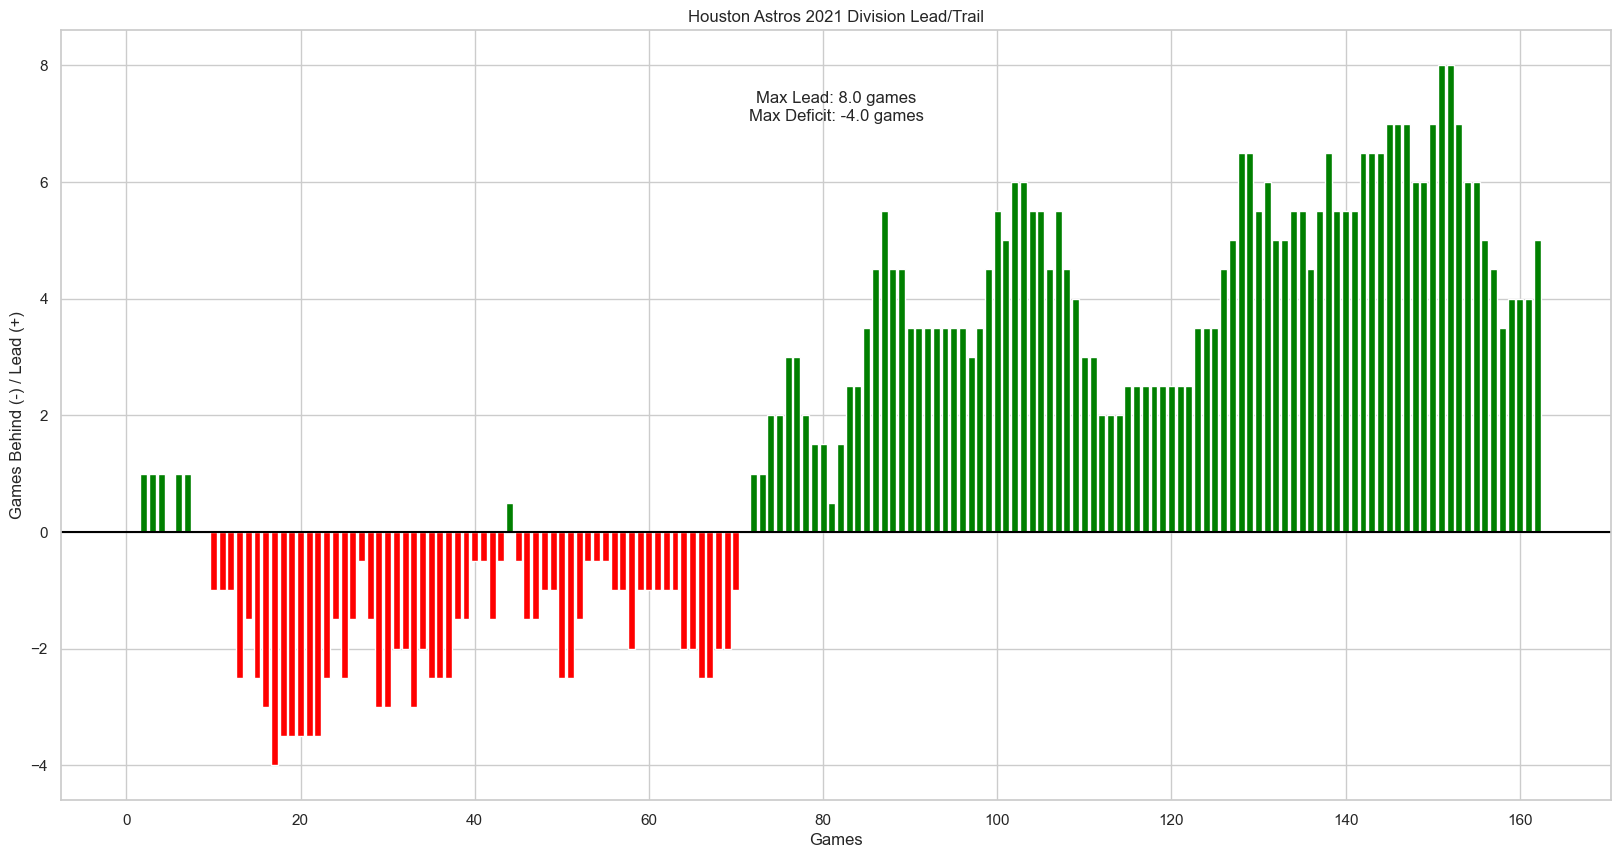

/var/folders/sx/239lgvxx1yn2qrq3szxf8q380000gn/T/ipykernel_62288/1634601460.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  astros_season['GB'] = astros_season['GB'].astype(str)
/var/folders/sx/239lgvxx1yn2qrq3szxf8q380000gn/T/ipykernel_62288/1634601460.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  astros_season['GB_Clean'] = astros_season['GB'].replace('Tied', '0').str.replace(r'\+', '', regex=True)
/var/folders/sx/239lgvxx1yn2qrq3szxf8q380000gn/T/ipykernel_62288/1634601460.py:15: SettingWithCo

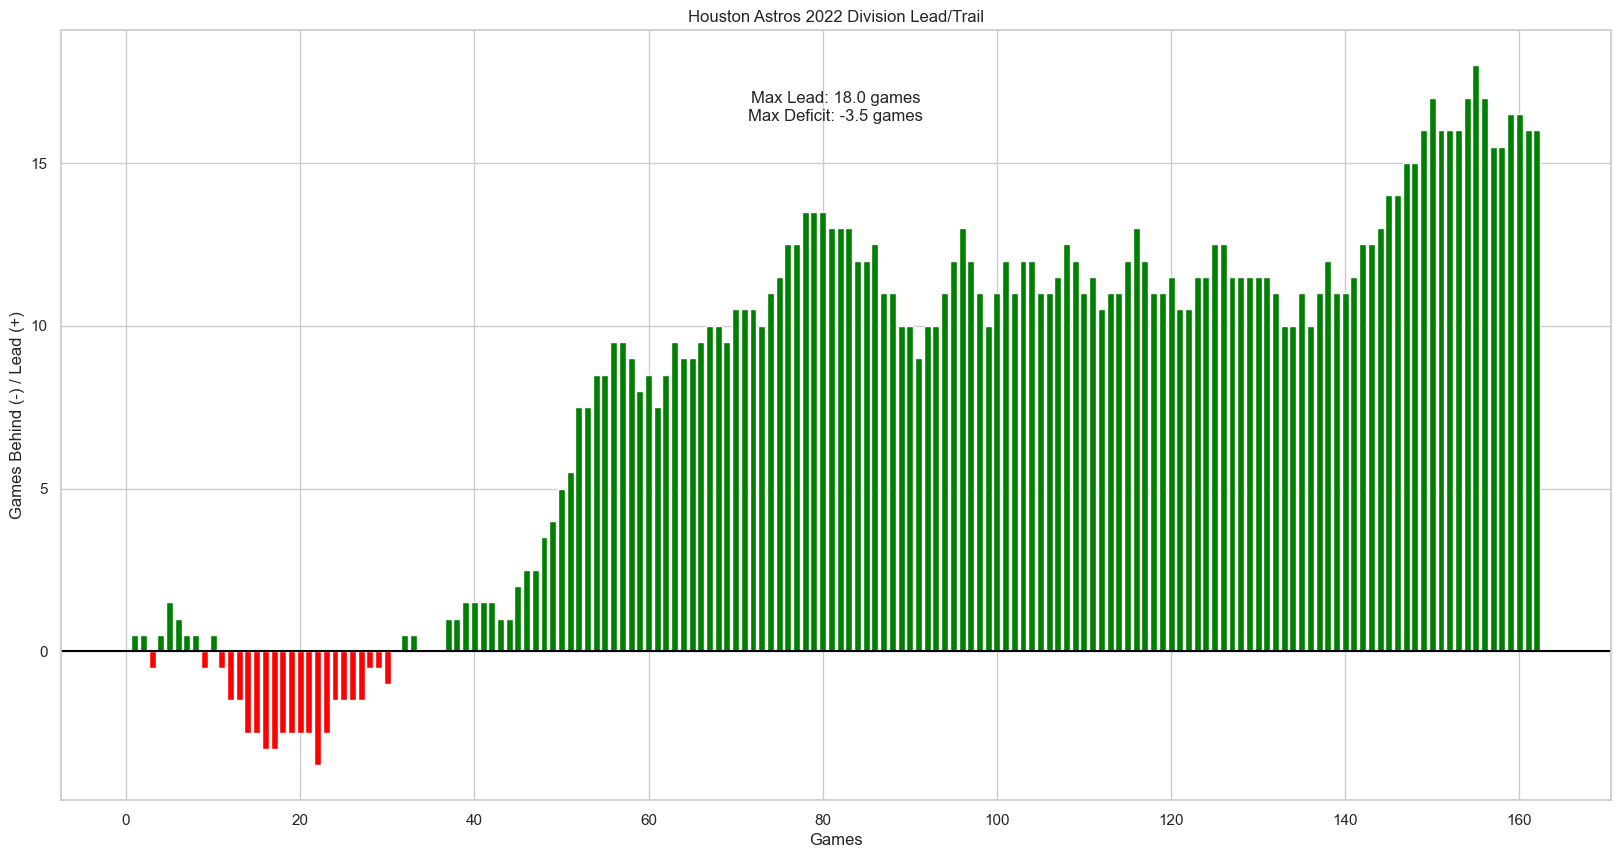

/var/folders/sx/239lgvxx1yn2qrq3szxf8q380000gn/T/ipykernel_62288/1634601460.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  astros_season['GB'] = astros_season['GB'].astype(str)
/var/folders/sx/239lgvxx1yn2qrq3szxf8q380000gn/T/ipykernel_62288/1634601460.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  astros_season['GB_Clean'] = astros_season['GB'].replace('Tied', '0').str.replace(r'\+', '', regex=True)
/var/folders/sx/239lgvxx1yn2qrq3szxf8q380000gn/T/ipykernel_62288/1634601460.py:15: SettingWithCo

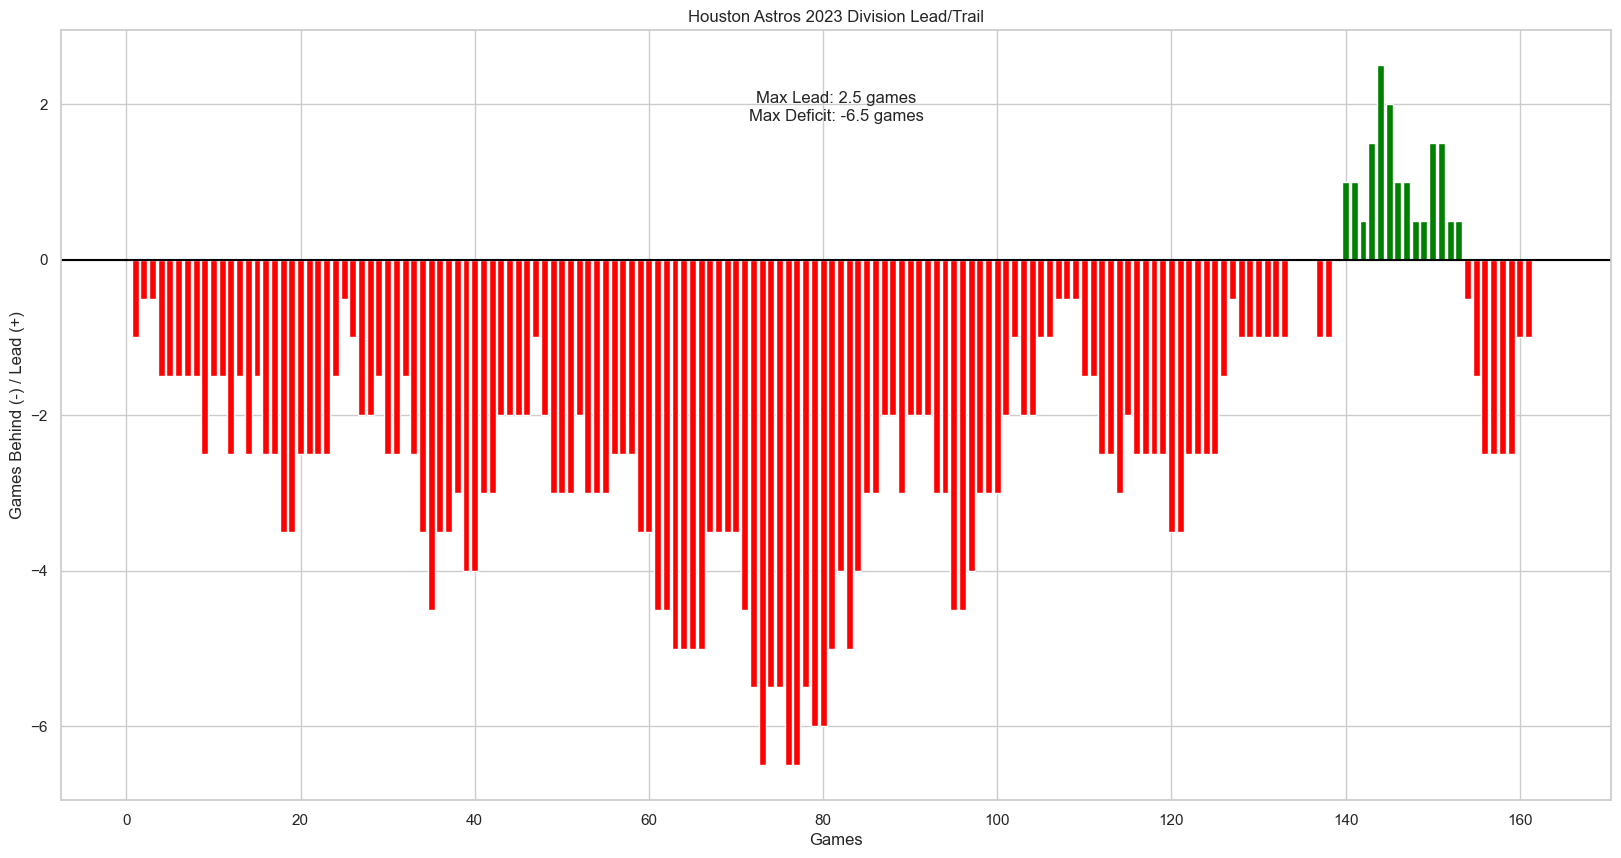

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Dictionary to store plot objects
season_plots = {}

# Loop through each season from 2017 to 2023
for season in range(2017, 2024):
    # Filter for the specific season
    astros_season = astros[astros['Season'] == season]
    
    # Clean the 'GB' column
    astros_season['GB'] = astros_season['GB'].astype(str)
    astros_season['GB_Clean'] = astros_season['GB'].replace('Tied', '0').str.replace(r'\+', '', regex=True)
    astros_season['GB_Clean'] = pd.to_numeric(astros_season['GB_Clean'], errors='coerce')
    astros_season['GB_Clean'] = astros_season['GB_Clean'] * astros_season['GB'].str.contains(r'\+').map({True: 1, False: -1})
    astros_season['color'] = ['green' if x >= 0 else 'red' for x in astros_season['GB_Clean']]
    
    # Find the max lead and deficit
    max_lead = astros_season['GB_Clean'].max()
    max_deficit = astros_season['GB_Clean'].min()

    # Create the figure and axis objects for the plot
    fig, ax = plt.subplots(figsize=(20, 10))
    
    # Plot the data
    ax.bar(astros_season['Gm#'], astros_season['GB_Clean'], color=astros_season['color'])
    ax.axhline(y=0, color='black', linewidth=1.5)
    ax.set_xlabel('Games')
    ax.set_ylabel('Games Behind (-) / Lead (+)')
    ax.set_title(f'Houston Astros {season} Division Lead/Trail')
    ax.text(0.5, 0.9, f'Max Lead: {max_lead} games\nMax Deficit: {max_deficit} games', 
             horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    
    # Save the figure object in the dictionary
    season_plots[season] = fig
    
    # Optionally, display the plot
    plt.show()

    # Close the plot to save memory
    plt.close(fig)

    # Access specific plots with season_plots['Season']


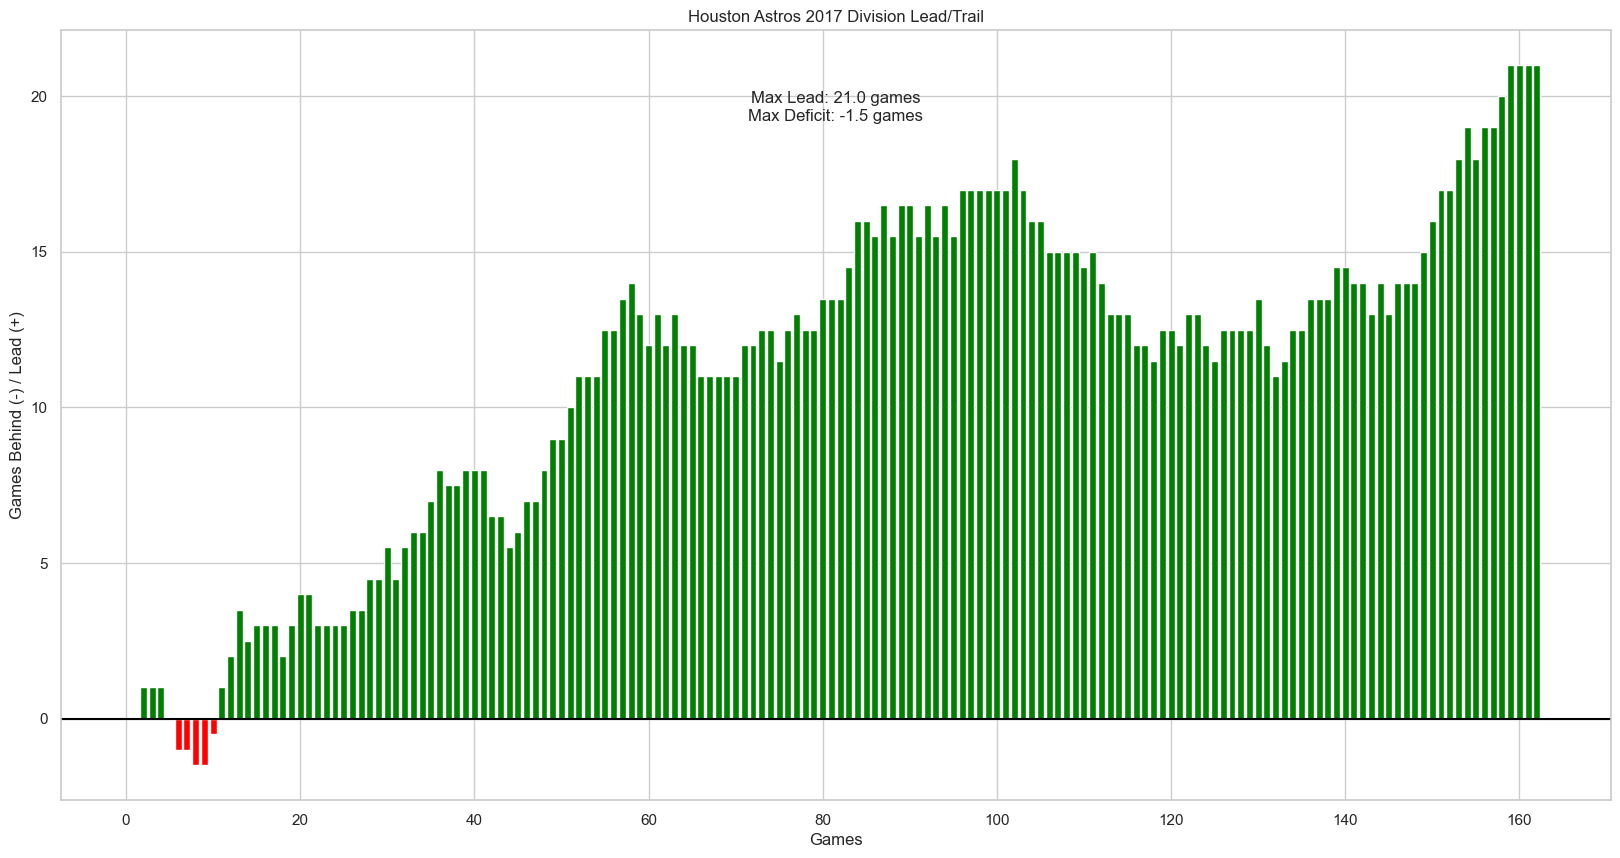

In [34]:
season_plots[2017]

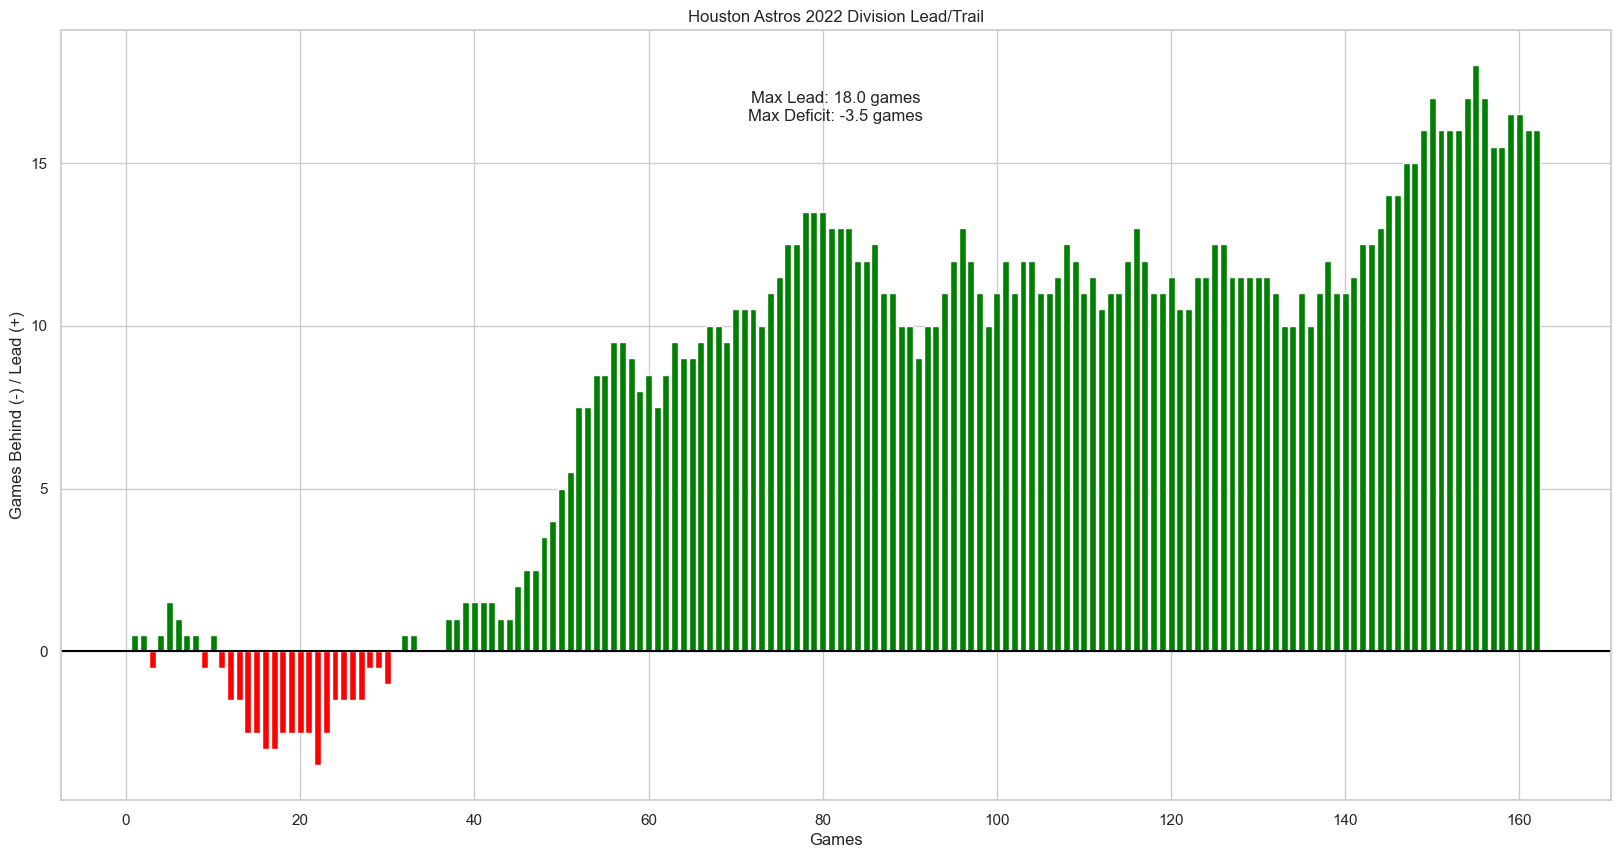

In [35]:
season_plots[2022]

In [36]:
# Show results of home and away
astros.groupby(['Home/Road', 'W/L']).size().unstack(fill_value=0)

# Adjusting the 'W/L' column to combine 'W*' with 'W' and 'L*' with 'L'
astros['Adjusted W/L'] = astros['W/L'].replace({'W*': 'W', 'L*': 'L'})

# Now, group by 'Home/Road' and the adjusted 'W/L' column, then count the occurrences
adjusted_result_counts = astros.groupby(['Home/Road', 'Adjusted W/L']).size().unstack(fill_value=0)

# Display the adjusted results
print(adjusted_result_counts)



Adjusted W/L    L    W
Home/Road             
@             206  312
vs            195  319


In [37]:
adjusted_result_counts['Win%'] = round(adjusted_result_counts['W'] / (adjusted_result_counts['W'] + adjusted_result_counts['L']),3)

# Reordering the columns so that 'Wins' appears before 'Losses'
adjusted_result_counts = adjusted_result_counts[['W', 'L', 'Win%']]

adjusted_result_counts

Adjusted W/L,W,L,Win%
Home/Road,,,
@,312,206,0.602
vs,319,195,0.621


In [49]:
# Show results of home and away
astros.groupby(['Season','Home/Road', 'W/L']).size().unstack(fill_value=0)

# Adjusting the 'W/L' column to combine 'W*' with 'W' and 'L*' with 'L'
astros['Adjusted W/L'] = astros['W/L'].replace({'W*': 'W', 'L*': 'L'})

# Group by 'Home/Road' and the adjusted 'W/L' column, then count the occurrences
home_road_season = astros.groupby(['Season', 'Home/Road', 'Adjusted W/L']).size().unstack(fill_value=0)

home_road_season['Win%'] = round(home_road_season['W'] / (home_road_season['W'] + home_road_season['L']),3)

# Display the adjusted results
print(home_road_season)

Adjusted W/L       L   W   Win%
Season Home/Road               
2017   @          28  53  0.654
       vs         33  48  0.593
2018   @          24  57  0.704
       vs         35  46  0.568
2019   @          34  47  0.580
       vs         21  60  0.741
2020   @          23   9  0.281
       vs          8  20  0.714
2021   @          37  44  0.543
       vs         30  51  0.630
2022   @          30  51  0.630
       vs         26  55  0.679
2023   @          30  51  0.630
       vs         42  39  0.481
